In [1]:
from itertools import permutations
import numpy as np

from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister


def get_permut_state_circuit(permut_items, instruction_set=["id", "u3", "cx"]):
    # Make permutations
    permuts = permutations(permut_items)
 
    # Build binary string for each permutation
    indices = []
    for i in list(permuts):
        indices.append("".join([format(x, "02b") for x in i])) # 02b because 2-bit per item

    # Calculate number of qubits
    num_qubits = len(permut_items) * 2 # 2-qubits per item

    # Make empty state vector
    vector_len = 2**num_qubits
    target_vector = np.zeros(vector_len, dtype=complex)

    # We have equal superposition: calculate amplitude
    amplitude = complex(1 / np.sqrt(len(indices)))
    
    # Set amplitudes in target state vector
    for item in indices:
        item_index = int(item, 2) # binary to decimal
        target_vector[item_index] = amplitude
    print(target_vector)    
    # Use qiskit's isometry function to make circuit
    qc = QuantumCircuit()
    qreg = QuantumRegister(num_qubits, "q")
    qc.add_register(qreg)
    #qc.isometry(target_vector, qreg[:num_qubits], [])
    qc.initialize(target_vector, qc.qubits)  
    
    # Transpile circuit to target instruction set
    qc = transpile(qc, basis_gates=instruction_set, optimization_level=3)

    return qc


qc = get_permut_state_circuit([0, 1])

[0.        +0.j 0.70710678+0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


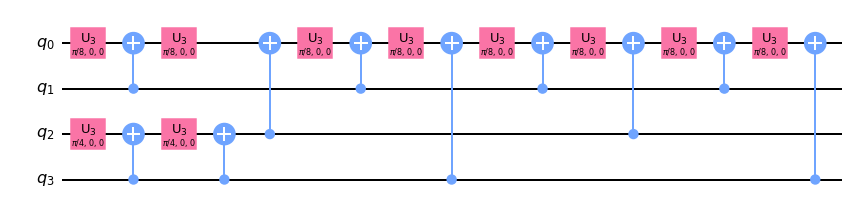

In [2]:
qc.draw('mpl')

In [3]:
## measure the address qubits  
cout = ClassicalRegister(4)
qc.add_register(cout)
qc.measure([0,1,2,3],cout)

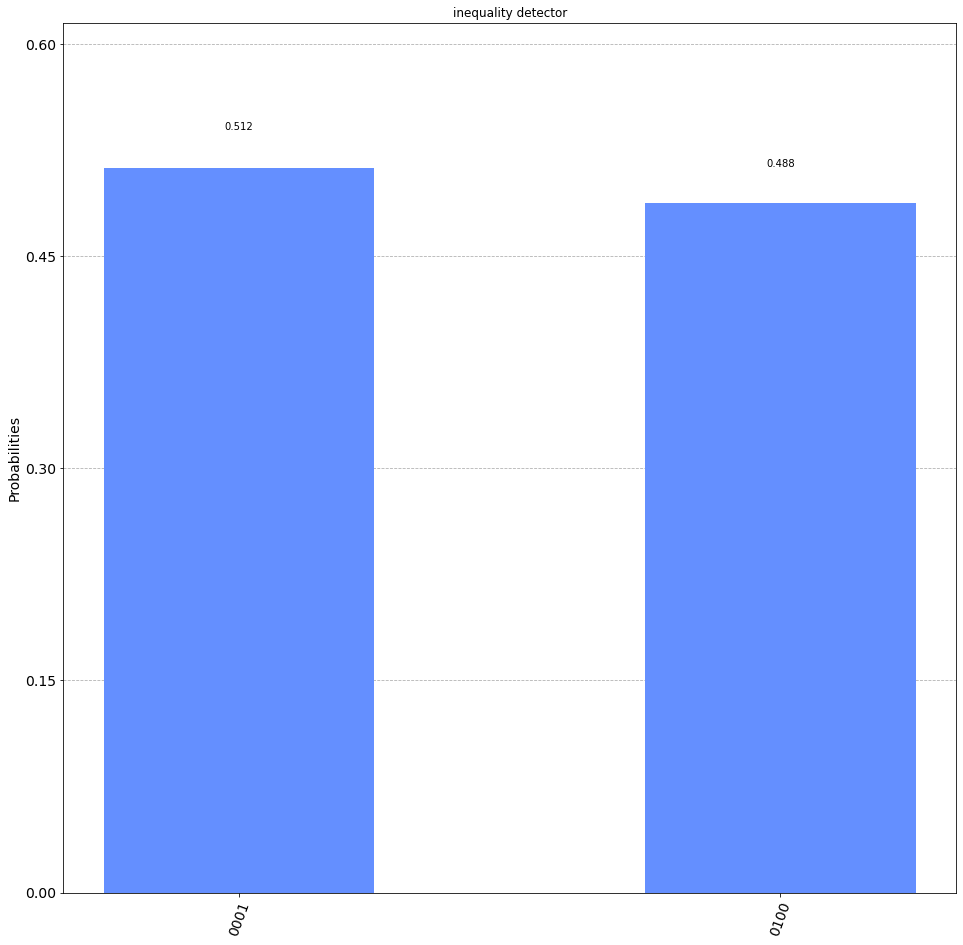

In [4]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=5000)

# Grab results from the job
result = job.result()

# Return counts
counts = result.get_counts(qc)
plot_histogram(counts, figsize=(16, 16),title="inequality detector")